# Five qubits error correcting code

This notebook implements the five qubit error correcting code circuit, to protect a qubit from bit and phase flip errors.

## Importing needed modules

In [184]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.quantum_info.states import Statevector

## Three qubit encoding

Because of the no cloning theorem we cannot copy a qubit to add redundancy like we would do in classical computing. What we can do instead is implementing the following encoding:<br><br>
<center>
$|0\rangle \rightarrow \frac{1}{4}[|00000\rangle + |00011\rangle + |00101\rangle + |00110\rangle + |01001\rangle + |01010\rangle + |01100>\rangle + |01111\rangle + |10001\rangle + |10010\rangle + |10111\rangle + |11011\rangle+ |11110\rangle + |00000\rangle + |00000\rangle + |11110\rangle]$
<br>
$|1\rangle \rightarrow \frac{1}{4}[|00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle+ |00000\rangle + |00000\rangle + |00000\rangle + |00000\rangle]$
</center>


## Inizializing the circuit

For the circuit we need three qubits for the econding and two auxiliary qubits that will be used to detect if the bit flip occured and in which qubit.

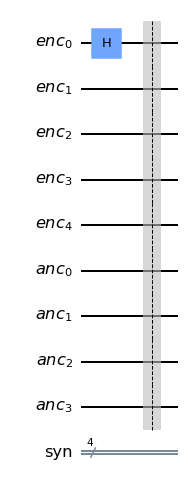

In [229]:
q_enc = QuantumRegister(5, "enc")
q_anc = QuantumRegister(4, "anc")
c_syn = ClassicalRegister(4, "syn")

qc = QuantumCircuit(q_enc, q_anc, c_syn)
qc.h(q_enc[0])
qc.barrier()
qc.draw(output="mpl")

## Implementing the encoding

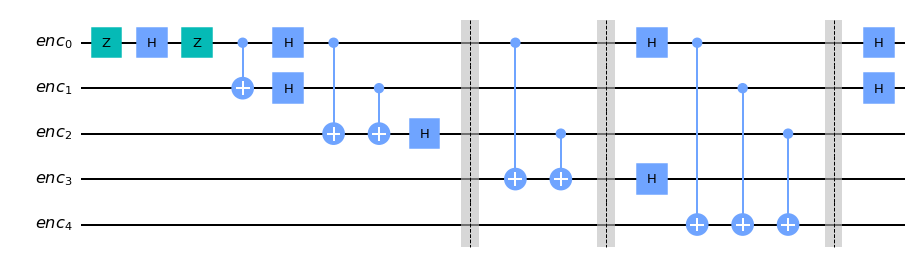

In [234]:
q_enc_t = QuantumRegister(5, "enc")
qc_encoding = QuantumCircuit(q_enc_t)

qc_encoding.z(q_enc_t[0])
qc_encoding.h(q_enc_t[0])
qc_encoding.z(q_enc_t[0])

qc_encoding.cx(q_enc_t[0], q_enc_t[1])

qc_encoding.h(q_enc_t[0])
qc_encoding.h(q_enc_t[1])

qc_encoding.cx(q_enc_t[0], q_enc_t[2])
qc_encoding.cx(q_enc_t[1], q_enc_t[2])

qc_encoding.h(q_enc_t[2])
qc_encoding.barrier()

qc_encoding.cx(q_enc_t[0], q_enc_t[3])
qc_encoding.cx(q_enc_t[2], q_enc_t[3])

qc_encoding.barrier()

qc_encoding.h(q_enc_t[0])
qc_encoding.h(q_enc_t[3])

qc_encoding.cx(q_enc_t[0], q_enc_t[4])
qc_encoding.cx(q_enc_t[1], q_enc_t[4])
qc_encoding.cx(q_enc_t[2], q_enc_t[4])

qc_encoding.barrier()

qc_encoding.h(q_enc_t[0])
qc_encoding.h(q_enc_t[1])


'''
backend = Aer.get_backend('statevector_simulator')
#job = backend.run(qc)
#result = job.result()
outputstate = execute(qc_encoding, backend).result().get_statevector(decimals=3)
print(outputstate)
'''
qc_encoding.draw(output="mpl")

## Adding the circuit for the encoding in the main circuit

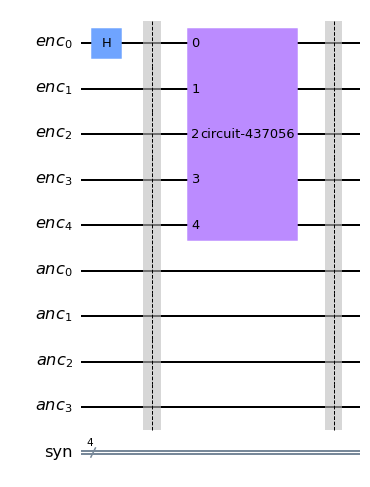

In [235]:
qc.append(qc_encoding, [q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4]])
qc.barrier()
qc.draw("mpl")

## Simulate the bit flip error

We simulate a bit flip error by adding a $X$ gate on the second qubit

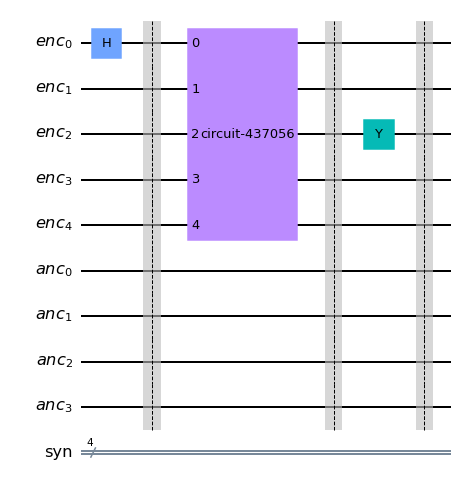

In [236]:
qc.y(q_enc[2])

qc.barrier()

qc.draw(output="mpl")

## Implementing the error detecting-correcting circuit

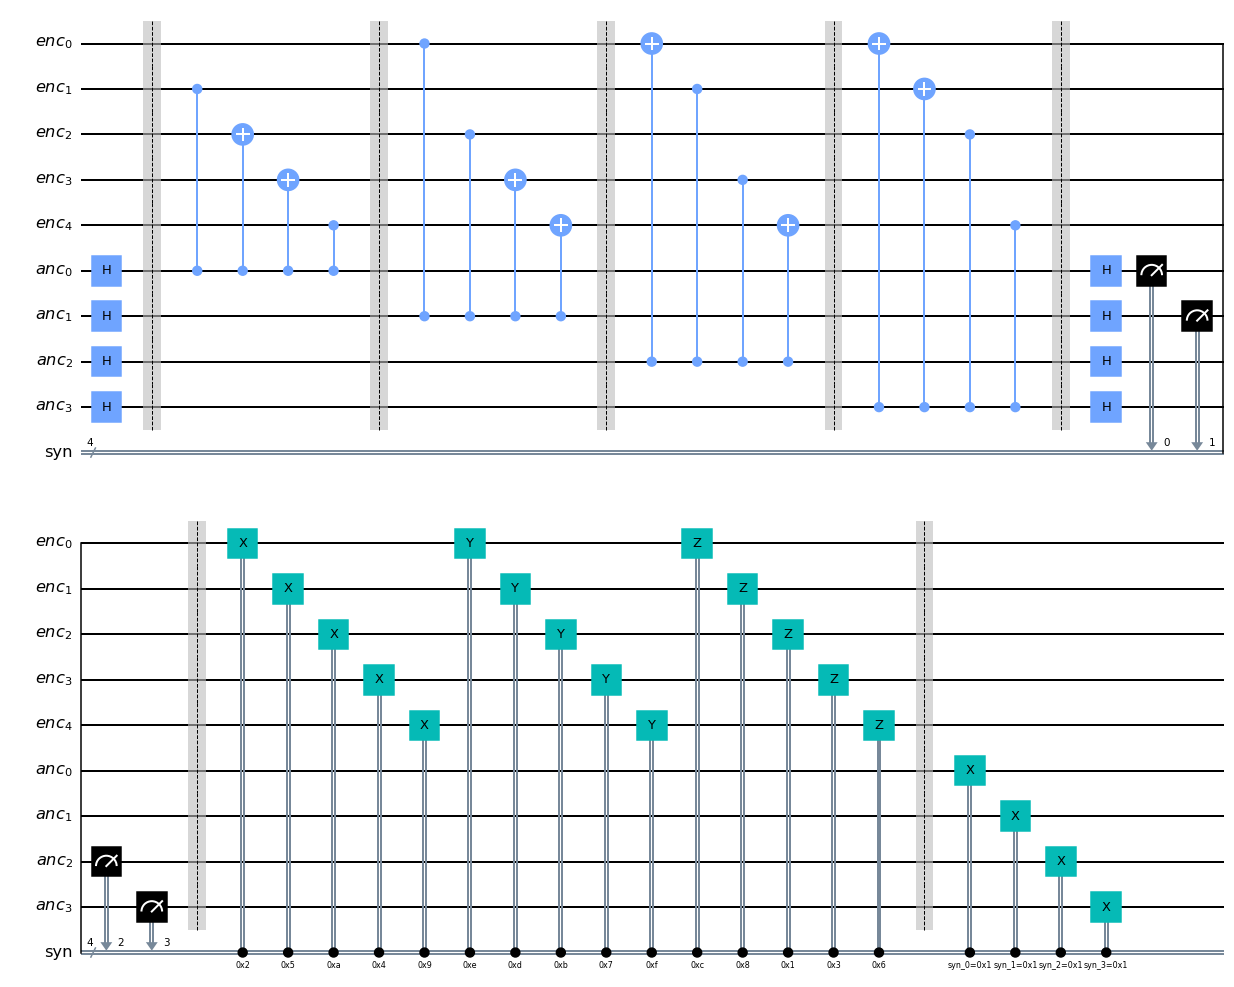

In [237]:
q_enc_t = QuantumRegister(5, "enc")
q_anc_t = QuantumRegister(4, "anc")
c_syn_t = ClassicalRegister(4, "syn")

qc_correct = QuantumCircuit(q_enc_t, q_anc_t, c_syn_t)
qc_correct.h(q_anc_t[0])
qc_correct.h(q_anc_t[1])
qc_correct.h(q_anc_t[2])
qc_correct.h(q_anc_t[3])
qc_correct.barrier()

qc_correct.cz(q_anc_t[0], q_enc_t[1])
qc_correct.cx(q_anc_t[0], q_enc_t[2])
qc_correct.cx(q_anc_t[0], q_enc_t[3])
qc_correct.cz(q_anc_t[0], q_enc_t[4])
qc_correct.barrier()


qc_correct.cz(q_anc_t[1], q_enc_t[0])
qc_correct.cz(q_anc_t[1], q_enc_t[2])
qc_correct.cx(q_anc_t[1], q_enc_t[3])
qc_correct.cx(q_anc_t[1], q_enc_t[4])
qc_correct.barrier()


qc_correct.cx(q_anc_t[2], q_enc_t[0])
qc_correct.cz(q_anc_t[2], q_enc_t[1])
qc_correct.cz(q_anc_t[2], q_enc_t[3])
qc_correct.cx(q_anc_t[2], q_enc_t[4])
qc_correct.barrier()


qc_correct.cx(q_anc_t[3], q_enc_t[0])
qc_correct.cx(q_anc_t[3], q_enc_t[1])
qc_correct.cz(q_anc_t[3], q_enc_t[2])
qc_correct.cz(q_anc_t[3], q_enc_t[4])
qc_correct.barrier()

qc_correct.h(q_anc_t[0])
qc_correct.h(q_anc_t[1])
qc_correct.h(q_anc_t[2])
qc_correct.h(q_anc_t[3])

qc_correct.measure(q_anc_t, c_syn_t)

qc_correct.barrier()


qc_correct.x(q_enc_t[0]).c_if(c_syn_t, 2)
qc_correct.x(q_enc_t[1]).c_if(c_syn_t, 5)
qc_correct.x(q_enc_t[2]).c_if(c_syn_t, 10)
qc_correct.x(q_enc_t[3]).c_if(c_syn_t, 4)
qc_correct.x(q_enc_t[4]).c_if(c_syn_t, 9)


qc_correct.y(q_enc_t[0]).c_if(c_syn_t, 14)
qc_correct.y(q_enc_t[1]).c_if(c_syn_t, 13)
qc_correct.y(q_enc_t[2]).c_if(c_syn_t, 11)
qc_correct.y(q_enc_t[3]).c_if(c_syn_t, 7)
qc_correct.y(q_enc_t[4]).c_if(c_syn_t, 15)

qc_correct.z(q_enc_t[0]).c_if(c_syn_t, 12)
qc_correct.z(q_enc_t[1]).c_if(c_syn_t, 8)
qc_correct.z(q_enc_t[2]).c_if(c_syn_t, 1)
qc_correct.z(q_enc_t[3]).c_if(c_syn_t, 3)
qc_correct.z(q_enc_t[4]).c_if(c_syn_t, 6)

qc_correct.barrier()

qc_correct.x(q_anc_t[0]).c_if(c_syn_t[0], 1)
qc_correct.x(q_anc_t[1]).c_if(c_syn_t[1], 1)
qc_correct.x(q_anc_t[2]).c_if(c_syn_t[2], 1)
qc_correct.x(q_anc_t[3]).c_if(c_syn_t[3], 1)

qc_correct.draw("mpl")

## Adding the recovery circuit to the main circuit

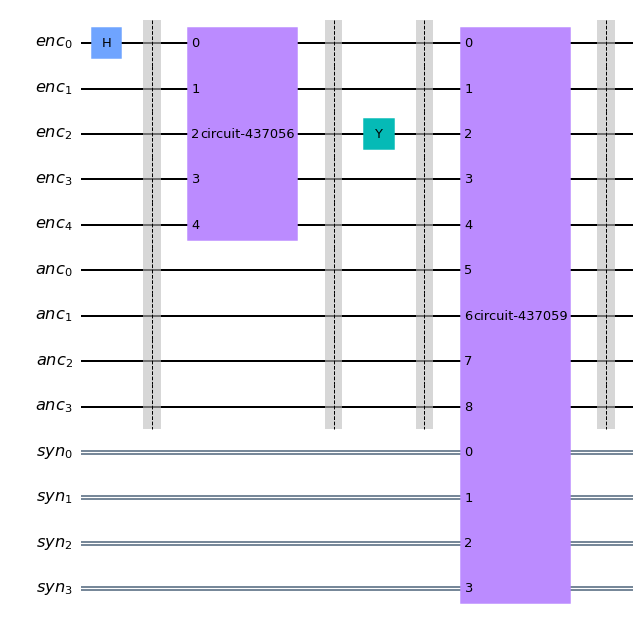

In [238]:
qc.append(qc_correct, qargs=[q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4], q_anc[0], q_anc[1], q_anc[2], q_anc[3]],
          cargs=[c_syn[0], c_syn[1], c_syn[2], c_syn[3]])
qc.barrier()

qc.draw("mpl")

## Decoding circuit

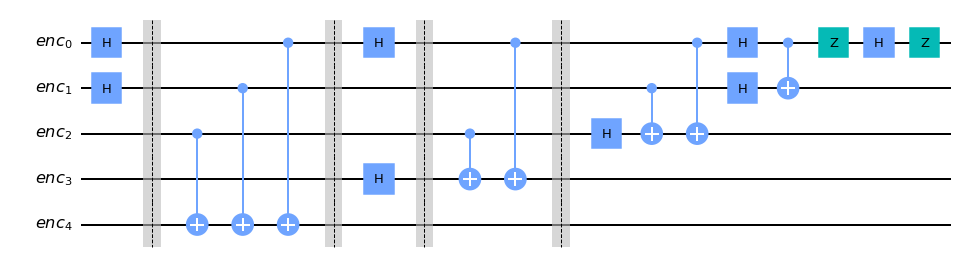

In [239]:
q_enc_t = QuantumRegister(5, "enc")
qc_decoding = QuantumCircuit(q_enc_t)

qc_decoding.h(q_enc_t[1])
qc_decoding.h(q_enc_t[0])

qc_decoding.barrier()

qc_decoding.cx(q_enc_t[2], q_enc_t[4])
qc_decoding.cx(q_enc_t[1], q_enc_t[4])
qc_decoding.cx(q_enc_t[0], q_enc_t[4])

qc_decoding.barrier()

qc_decoding.h(q_enc_t[3])
qc_decoding.h(q_enc_t[0])

qc_decoding.barrier()

qc_decoding.cx(q_enc_t[2], q_enc_t[3])
qc_decoding.cx(q_enc_t[0], q_enc_t[3])

qc_decoding.barrier()

qc_decoding.h(q_enc_t[2])

qc_decoding.cx(q_enc_t[1], q_enc_t[2])
qc_decoding.cx(q_enc_t[0], q_enc_t[2])

qc_decoding.h(q_enc_t[1])
qc_decoding.h(q_enc_t[0])

qc_decoding.cx(q_enc_t[0], q_enc_t[1])


qc_decoding.z(q_enc_t[0])
qc_decoding.h(q_enc_t[0])
qc_decoding.z(q_enc_t[0])


qc_decoding.draw("mpl")

## Adding the decoding cirucit to the main circuit

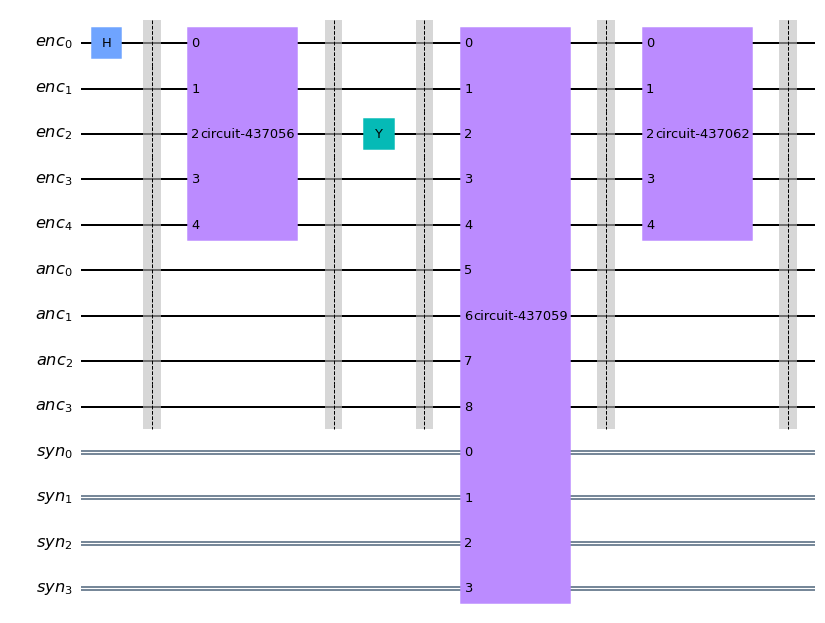

In [240]:
qc.append(qc_decoding, [q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4]])
qc.barrier()
qc.draw("mpl")

## Executing the circuit

In [241]:
backend = Aer.get_backend('statevector_simulator')
#job = backend.run(qc)
#result = job.result()
outputstate = execute(qc, backend).result().get_statevector(decimals=3)
#outputstate = result.get_statevector(qc, decimals=3)
alpha = outputstate[0]
beta = outputstate[1]

simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
syndrome = job.result().get_counts(qc)
print(f"Syndrome qubits: {list(syndrome.keys())[0][::-1]}")
print(f"Decoded state:\n{alpha}|0> + {beta}|1>")

Syndrome qubits: 1101
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>


## Defining a test function

In [214]:
def circuit(input_qubit, x_error_mask, y_error_mask, z_error_mask):
    
    # initialization
    
    q_enc = QuantumRegister(5, "enc")
    q_anc = QuantumRegister(4, "anc")
    c_syn = ClassicalRegister(4, "syn")

    qc = QuantumCircuit(q_enc, q_anc, c_syn)
    qc.h(q_enc[0])
    qc.barrier()
    
    # encoding

    q_enc_t = QuantumRegister(5, "enc")
    qc_encoding = QuantumCircuit(q_enc_t)

    qc_encoding.z(q_enc_t[0])
    qc_encoding.h(q_enc_t[0])
    qc_encoding.z(q_enc_t[0])

    qc_encoding.cx(q_enc_t[0], q_enc_t[1])

    qc_encoding.h(q_enc_t[0])
    qc_encoding.h(q_enc_t[1])

    qc_encoding.cx(q_enc_t[0], q_enc_t[2])
    qc_encoding.cx(q_enc_t[1], q_enc_t[2])

    qc_encoding.h(q_enc_t[2])
    qc_encoding.barrier()

    qc_encoding.cx(q_enc_t[0], q_enc_t[3])
    qc_encoding.cx(q_enc_t[2], q_enc_t[3])

    qc_encoding.barrier()

    qc_encoding.h(q_enc_t[0])
    qc_encoding.h(q_enc_t[3])

    qc_encoding.cx(q_enc_t[0], q_enc_t[4])
    qc_encoding.cx(q_enc_t[1], q_enc_t[4])
    qc_encoding.cx(q_enc_t[2], q_enc_t[4])

    qc_encoding.barrier()

    qc_encoding.h(q_enc_t[0])
    qc_encoding.h(q_enc_t[1])
    
    qc.append(qc_encoding, [q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4]])
    qc.barrier()
    
    # error
    
    for i in range(5):
        if x_error_mask[i] == 1:
            qc.x(q_enc[i])
        if y_error_mask[i] == 1:
            qc.y(q_enc[i])
        if z_error_mask[i] == 1:
            qc.z(q_enc[i])
    
    
    # detection + correction
    
    q_enc_t = QuantumRegister(5, "enc")
    q_anc_t = QuantumRegister(4, "anc")
    c_syn_t = ClassicalRegister(4, "syn")

    qc_correct = QuantumCircuit(q_enc_t, q_anc_t, c_syn_t)
    qc_correct.h(q_anc_t[0])
    qc_correct.h(q_anc_t[1])
    qc_correct.h(q_anc_t[2])
    qc_correct.h(q_anc_t[3])
    qc_correct.barrier()

    qc_correct.cz(q_anc_t[0], q_enc_t[1])
    qc_correct.cx(q_anc_t[0], q_enc_t[2])
    qc_correct.cx(q_anc_t[0], q_enc_t[3])
    qc_correct.cz(q_anc_t[0], q_enc_t[4])
    qc_correct.barrier()


    qc_correct.cz(q_anc_t[1], q_enc_t[0])
    qc_correct.cz(q_anc_t[1], q_enc_t[2])
    qc_correct.cx(q_anc_t[1], q_enc_t[3])
    qc_correct.cx(q_anc_t[1], q_enc_t[4])
    qc_correct.barrier()


    qc_correct.cx(q_anc_t[2], q_enc_t[0])
    qc_correct.cz(q_anc_t[2], q_enc_t[1])
    qc_correct.cz(q_anc_t[2], q_enc_t[3])
    qc_correct.cx(q_anc_t[2], q_enc_t[4])
    qc_correct.barrier()


    qc_correct.cx(q_anc_t[3], q_enc_t[0])
    qc_correct.cx(q_anc_t[3], q_enc_t[1])
    qc_correct.cz(q_anc_t[3], q_enc_t[2])
    qc_correct.cz(q_anc_t[3], q_enc_t[4])
    qc_correct.barrier()

    qc_correct.h(q_anc_t[0])
    qc_correct.h(q_anc_t[1])
    qc_correct.h(q_anc_t[2])
    qc_correct.h(q_anc_t[3])

    qc_correct.measure(q_anc_t[0], c_syn_t[0])
    qc_correct.measure(q_anc_t[1], c_syn_t[1])
    qc_correct.measure(q_anc_t[2], c_syn_t[2])
    qc_correct.measure(q_anc_t[3], c_syn_t[3])

    qc_correct.barrier()

    qc_correct.x(q_enc_t[0]).c_if(c_syn_t, 2)
    qc_correct.x(q_enc_t[1]).c_if(c_syn_t, 5)
    qc_correct.x(q_enc_t[2]).c_if(c_syn_t, 10)
    qc_correct.x(q_enc_t[3]).c_if(c_syn_t, 4)
    qc_correct.x(q_enc_t[4]).c_if(c_syn_t, 9)

    
    qc_correct.y(q_enc_t[0]).c_if(c_syn_t, 14)
    qc_correct.y(q_enc_t[1]).c_if(c_syn_t, 13)
    qc_correct.y(q_enc_t[2]).c_if(c_syn_t, 11)
    qc_correct.y(q_enc_t[3]).c_if(c_syn_t, 7)
    qc_correct.y(q_enc_t[4]).c_if(c_syn_t, 15)
    
    qc_correct.z(q_enc_t[0]).c_if(c_syn_t, 12)
    qc_correct.z(q_enc_t[1]).c_if(c_syn_t, 8)
    qc_correct.z(q_enc_t[2]).c_if(c_syn_t, 1)
    qc_correct.z(q_enc_t[3]).c_if(c_syn_t, 3)
    qc_correct.z(q_enc_t[4]).c_if(c_syn_t, 6)
    
    
    qc_correct.x(q_anc_t[0]).c_if(c_syn_t[0], 1)
    qc_correct.x(q_anc_t[1]).c_if(c_syn_t[1], 1)
    qc_correct.x(q_anc_t[2]).c_if(c_syn_t[2], 1)
    qc_correct.x(q_anc_t[3]).c_if(c_syn_t[3], 1)
    
    qc.append(qc_correct, qargs=[q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4], q_anc[0], q_anc[1], q_anc[2], q_anc[3]],
              cargs=[c_syn[0], c_syn[1], c_syn[2], c_syn[3]])
    qc.barrier()
    
    
    # decoding

    q_enc_t = QuantumRegister(5, "enc")
    qc_decoding = QuantumCircuit(q_enc_t)

    qc_decoding.h(q_enc_t[1])
    qc_decoding.h(q_enc_t[0])

    qc_decoding.barrier()

    qc_decoding.cx(q_enc_t[2], q_enc_t[4])
    qc_decoding.cx(q_enc_t[1], q_enc_t[4])
    qc_decoding.cx(q_enc_t[0], q_enc_t[4])

    qc_decoding.barrier()

    qc_decoding.h(q_enc_t[3])
    qc_decoding.h(q_enc_t[0])

    qc_decoding.barrier()

    qc_decoding.cx(q_enc_t[2], q_enc_t[3])
    qc_decoding.cx(q_enc_t[0], q_enc_t[3])

    qc_decoding.barrier()

    qc_decoding.h(q_enc_t[2])

    qc_decoding.cx(q_enc_t[1], q_enc_t[2])
    qc_decoding.cx(q_enc_t[0], q_enc_t[2])

    qc_decoding.h(q_enc_t[1])
    qc_decoding.h(q_enc_t[0])

    qc_decoding.cx(q_enc_t[0], q_enc_t[1])


    qc_decoding.z(q_enc_t[0])
    qc_decoding.h(q_enc_t[0])
    qc_decoding.z(q_enc_t[0])
    
    
    qc.append(qc_decoding, [q_enc[0], q_enc[1], q_enc[2], q_enc[3], q_enc[4]])
    qc.barrier()
    
    # get state vector    
    backend = Aer.get_backend('statevector_simulator')
    outputstate = execute(qc, backend).result().get_statevector(decimals=3)
    alpha = outputstate[0]
    beta = outputstate[1]

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)
    syndrome = job.result().get_counts(qc)
    
    return alpha, beta, syndrome, qc

Syndrome qubits: 0000
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>


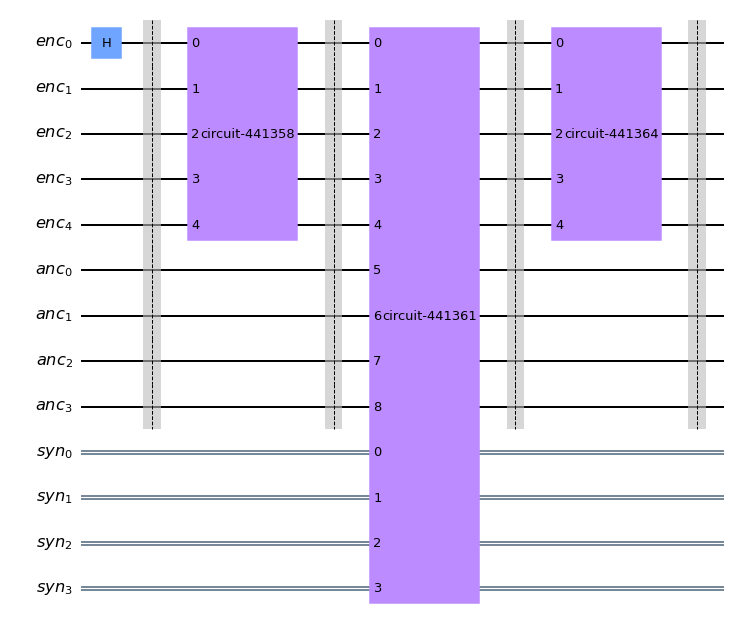

In [244]:
alpha, beta, syndrome, qc = circuit(0, (0,0,0,0,0), (0,0,0,0,0), (0,0,0,0,0))
print(f"Syndrome qubits: {list(syndrome.keys())[0][::-1]}")
print(f"Decoded state:\n{alpha}|0> + {beta}|1>")
qc.draw("mpl")

In [221]:
i = 0
for mask in [(1,0,0,0,0),(0,1,0,0,0),(0,0,1,0,0),(0,0,0,1,0),(0,0,0,0,1)]:
    i+=1
    alpha, beta, syndrome, qc = circuit(0, mask, (0,0,0,0,0), (0,0,0,0,0))
    print("X" + str(i) + ":" + list(syndrome.keys())[0][::-1])
    print(f"Decoded state:\n{alpha}|0> + {beta}|1>\n")

i = 0
for mask in [(1,0,0,0,0),(0,1,0,0,0),(0,0,1,0,0),(0,0,0,1,0),(0,0,0,0,1)]:
    i+=1
    alpha, beta, syndrome, qc = circuit(0, (0,0,0,0,0), mask, (0,0,0,0,0))
    print("Y" + str(i) + ":" + list(syndrome.keys())[0][::-1])
    print(f"Decoded state:\n{alpha}|0> + {beta}|1>\n")
    
i = 0
for mask in [(1,0,0,0,0),(0,1,0,0,0),(0,0,1,0,0),(0,0,0,1,0),(0,0,0,0,1)]:
    i+=1
    alpha, beta, syndrome, qc = circuit(0, (0,0,0,0,0), (0,0,0,0,0), mask)
    print("Z" + str(i) + ":" + list(syndrome.keys())[0][::-1])
    print(f"Decoded state:\n{alpha}|0> + {beta}|1>\n")

X1:0100
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

X2:1010
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

X3:0101
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

X4:0010
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

X5:1001
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Y1:0111
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Y2:1011
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Y3:1101
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Y4:1110
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Y5:1111
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Z1:0011
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Z2:0001
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Z3:1000
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Z4:1100
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

Z5:0110
Decoded state:
(0.707-0j)|0> + (0.707-0j)|1>

